# SQL movies & directors

## Importing libraries

In [34]:
import pandas as pd
import matplotlib as plt

## Connecting database

In [2]:
import sqlite3
conn = sqlite3.connect('movies.sqlite')
c = conn.cursor()

## Checking data 

In [3]:
c.execute("SELECT * FROM movies") 
movies = c.fetchall()

In [4]:
col_names_movies = list(map(lambda x: x[0], c.description))
col_names_movies

['title',
 'rating',
 'vote_count',
 'start_year',
 'minutes',
 'genres',
 'imdb_id',
 'id',
 'director_id']

### movies dataframe

In [5]:
movies_df = pd.DataFrame(movies, columns=[col_names_movies])
movies_df.head()

,title,rating,vote_count,start_year,minutes,genres,imdb_id,id,director_id
0,A Trip to the Moon,8.2,39710,1902,13.0,"Action,Adventure,Comedy",tt0000417,1,1
1,The Great Train Robbery,7.3,15526,1903,11.0,"Action,Crime,Short",tt0000439,2,2
2,The Birth of a Nation,6.4,20774,1915,195.0,"Drama,History,War",tt0004972,3,4
3,Intolerance: Love's Struggle Throughout the Ages,7.8,13051,1916,163.0,"Drama,History",tt0006864,4,4
4,The Cabinet of Dr. Caligari,8.1,51029,1920,76.0,"Fantasy,Horror,Mystery",tt0010323,5,5


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9875 entries, 0 to 9874
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (title,)        9875 non-null   object 
 1   (rating,)       9875 non-null   object 
 2   (vote_count,)   9875 non-null   int64  
 3   (start_year,)   9875 non-null   int64  
 4   (minutes,)      9838 non-null   float64
 5   (genres,)       9875 non-null   object 
 6   (imdb_id,)      9875 non-null   object 
 7   (id,)           9875 non-null   int64  
 8   (director_id,)  9875 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 694.5+ KB


### directors dataframe

In [7]:
c.execute("SELECT * FROM directors") 
directors = c.fetchall()

In [8]:
col_names_director = list(map(lambda x: x[0], c.description))
col_names_director 

['name', 'birth_year', 'death_year', 'imdb_director_id', 'id']

In [9]:
directors_df = pd.DataFrame(directors, columns=[col_names_director])
directors_df.head()

,name,birth_year,death_year,imdb_director_id,id
0,Georges Méliès,1861.0,1938.0,nm0617588,1
1,Edwin S. Porter,1870.0,1941.0,nm0692105,2
2,D.W. Griffith,1875.0,1948.0,nm0000428,4
3,Robert Wiene,1873.0,1938.0,nm0927468,5
4,Charles Chaplin,1889.0,1977.0,nm0000122,13


In [10]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (name,)              4089 non-null   object 
 1   (birth_year,)        2698 non-null   float64
 2   (death_year,)        458 non-null    float64
 3   (imdb_director_id,)  4089 non-null   object 
 4   (id,)                4089 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 159.9+ KB


# Exploring database 

## Number of directors

In [11]:
# How many directors are in this database?

c.execute("SELECT COUNT(*) FROM directors;") 
num_directors = c.fetchone()[0]
print(num_directors)

4089


## List of directors


In [12]:
#What is the list of all the names of all the directors sorted in alphabetical order?

c.execute("""SELECT name
FROM directors
ORDER BY name""") 
list_directors = c.fetchall()
list_directors

[('A.R. Murugadoss',),
 ('Aamir Khan',),
 ('Aanand L. Rai',),
 ('Aaron Hann',),
 ('Aaron Harvey',),
 ('Aaron Horvath',),
 ('Aaron Lipstadt',),
 ('Aaron Moorhead',),
 ('Aaron Schneider',),
 ('Aaron Seltzer',),
 ('Aaron Sorkin',),
 ('Aaron Springer',),
 ('Abbas Alibhai Burmawalla',),
 ('Abbas Kiarostami',),
 ('Abbas Tyrewala',),
 ('Abby Kohn',),
 ('Abdellatif Kechiche',),
 ('Abderrahmane Sissako',),
 ('Abe Sylvia',),
 ('Abel Ferrara',),
 ('Abhinav Kashyap',),
 ('Abhinay Deo',),
 ('Abhishek Chaubey',),
 ('Abhishek Kapoor',),
 ('Abhishek Sharma',),
 ('Abhishek Varman',),
 ('Abram Cox',),
 ('Adam Arkin',),
 ('Adam Bernstein',),
 ('Adam Brooks',),
 ('Adam Davidson',),
 ('Adam Elliot',),
 ('Adam Green',),
 ('Adam Jay Epstein',),
 ('Adam Kassen',),
 ('Adam MacDonald',),
 ('Adam Marcus',),
 ('Adam McKay',),
 ('Adam Paloian',),
 ('Adam Randall',),
 ('Adam Rifkin',),
 ('Adam Robitel',),
 ('Adam Schindler',),
 ('Adam Shankman',),
 ('Adam Weissman',),
 ('Adam Wingard',),
 ('Adesh Prasad',),
 ('Adit

## List of movies about “love”


In [13]:
# What are the movies which contain the word “love” in their title, sorted in alphabetical order?

c.execute("""SELECT title
FROM movies
WHERE title LIKE '%LOVE %'
ORDER BY title; """) 
love_movies = c.fetchall()
love_movies

[('A Love Song for Bobby Long',),
 ('All the Boys Love Mandy Lane',),
 ('Capitalism: A Love Story',),
 ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',),
 ('Everyone Says I Love You',),
 ('For Love and Honor',),
 ('For Love of the Game',),
 ('For Love or Money',),
 ('I Love Lucy',),
 ('I Love Trouble',),
 ('I Love You Phillip Morris',),
 ('I Love You to Death',),
 ('I Love You, Beth Cooper',),
 ('I Love You, Man',),
 ('I Think I Love My Wife',),
 ('Love & Basketball',),
 ('Love & Friendship',),
 ('Love & Mercy',),
 ('Love & Other Drugs',),
 ('Love Aaj Kal',),
 ('Love Actually',),
 ('Love Exposure',),
 ('Love Happens',),
 ('Love Is All You Need',),
 ('Love Is Strange',),
 ('Love Likes Coincidences',),
 ('Love Me If You Dare',),
 ('Love Potion No. 9',),
 ('Love Story',),
 ('Love and Death',),
 ('Love and Other Disasters',),
 ('Love in the Afternoon',),
 ('Love in the Time of Cholera',),
 ('Love the Coopers',),
 ('Must Love Dogs',),
 ('New York, I Love You',),
 ('P

## Number of directors named like…


In [14]:
# How many directors contain a word, given by a user, in their name?

# define a function, where name is the input from user. 

def directors_named_like_count(name):
    query = """
        SELECT COUNT(*)
        FROM directors
        WHERE name LIKE ?
    """
    c.execute(query, (f"%{name}%",))
    count = c.fetchone()
    return count[0]

In [15]:
directors_named_like_count('adam')

21

## List of movies longer than…



In [16]:
# What are the movies which are longer than a duration, given by a user, sorted in the alphabetical order?

# define a function, where duration is the input from user. 

def movies_longer_than(duration):
    query = """
        SELECT title,minutes
        FROM movies
        WHERE minutes > ? 
        ORDER BY title; 
    """
    c.execute(query, (duration,))
    movies_longer = c.fetchall()
    return movies_longer


In [17]:
movies_longer_than(500)

[('Band of Brothers', 594),
 ('Cosmos', 557),
 ('Dekalog', 572),
 ('I, Claudius', 669),
 ('Jackass', 535),
 ('Neon Genesis Evangelion', 624),
 ('Planet Earth', 538),
 ('Roots', 588),
 ('Taken', 877),
 ('The Civil War', 680),
 ('The Godfather Trilogy: 1901-1980', 583),
 ('The Kingdom', 561),
 ('The Night Of', 525),
 ('The Pacific', 530),
 ('The Staircase', 629),
 ('The Vietnam War', 990),
 ('The Young Pope', 546)]

## Detailed movies


In [18]:
# detailed_movies to get all the movie titles with the corresponding genre and director name.

c.execute("""SELECT m.title, m.genres, d.name
FROM movies m
LEFT JOIN directors d 
ON m.director_id = d.id""") 
detailed_movies = c.fetchall()
col_names_det_movies = list(map(lambda x: x[0], c.description))

pd.DataFrame(detailed_movies, columns=[col_names_det_movies])

,title,genres,name
0,A Trip to the Moon,"Action,Adventure,Comedy",Georges Méliès
1,The Great Train Robbery,"Action,Crime,Short",Edwin S. Porter
2,The Birth of a Nation,"Drama,History,War",D.W. Griffith
3,Intolerance: Love's Struggle Throughout the Ages,"Drama,History",D.W. Griffith
4,The Cabinet of Dr. Caligari,"Fantasy,Horror,Mystery",Robert Wiene
...,...,...,...
9870,Enaaya,Drama,Wajahat Rauf
9871,Sonnie's Edge,"Animation,Comedy,Fantasy",Gabriele Pennacchioli
9872,The Witness,"Animation,Comedy,Fantasy",Alberto Mielgo
9873,Beyond the Aquila Rift,"Animation,Comedy,Fantasy",Dominique Boidin


## Late released movies


In [19]:
# Implement never_watched_movies to get the list of all movies which were released after their director passed away.

c.execute("""SELECT m.title
FROm movies m 
JOIN directors d 
ON m.director_id = d.id
WHERE d.death_year < m.start_year;""") 
late_movies = c.fetchall()
pd.DataFrame(late_movies, columns=["title"])


,title
0,Fantasia 2000
1,Game of Death
2,The Many Adventures of Winnie the Pooh
3,The Rescuers
4,Cars
5,Waitress


## Statistics



In [20]:
# Implement stats_on to get the statistics on a given genre, i.e. the number of movies and the average movie length (in minutes).

c.execute("""SELECT genres, COUNT(title) AS num_movies, ROUND(AVG(minutes),2) AS avg_duration
FROm movies 
GROUP BY genres;""")
stats = c.fetchall()
col_names_stats = list(map(lambda x: x[0], c.description))
pd.DataFrame(stats, columns=[col_names_stats])





,genres,num_movies,avg_duration
0,Action,6,113.67
1,"Action,Adventure",14,120.50
2,"Action,Adventure,Animation",155,59.21
3,"Action,Adventure,Biography",13,104.38
4,"Action,Adventure,Comedy",153,100.98
...,...,...,...
494,"Sci-Fi,Thriller",13,101.23
495,Talk-Show,1,60.00
496,Thriller,13,106.38
497,"Thriller,War",2,121.00


## Top 5 directors for a given genre


In [21]:
# Implement top_five_directors_for to get the top 5 directors that made the most movies for a given genre.
# This function should return a list of tuples like (name, number_of_movies).
# In case of a tie, directors should be sorted in alphabetical order.

In [22]:
def top_five_directors_for(genre):
    query = """
        SELECT d.name, COUNT(m.title) AS num_movies
        FROM movies m 
        JOIN directors d
        ON m.director_id = d.id
        WHERE m.genres = ?
        GROUP BY d.name
        ORDER BY num_movies DESC, d.name
        LIMIT 5;
        """
    c.execute(query, (genre,))
    top_five_directors_for = c.fetchall()
    return top_five_directors_for


In [23]:
top_five_directors_for('Drama')

[('Ingmar Bergman', 8),
 ('Nuri Bilge Ceylan', 5),
 ('Lars von Trier', 4),
 ('Michael Haneke', 4),
 ('Paul Thomas Anderson', 4)]

## Movie duration buckets


In [41]:
c.execute("""
        SELECT
            (minutes / 30 + 1)*30 time_range,
            COUNT(*) as count
        FROM movies
        WHERE minutes IS NOT NULL
        GROUP BY time_range
    """) 
buckets = c.fetchall()
col_names_buckets = list(map(lambda x: x[0], c.description))
df_buckets = pd.DataFrame(buckets, columns=['time_range','count'])

In [42]:
df_buckets

,time_range,count
0,30,292
1,60,764
2,90,1362
3,120,5302
4,150,1617
5,180,331
6,210,88
7,240,19
8,270,7
9,300,11


<AxesSubplot:xlabel='time_range'>

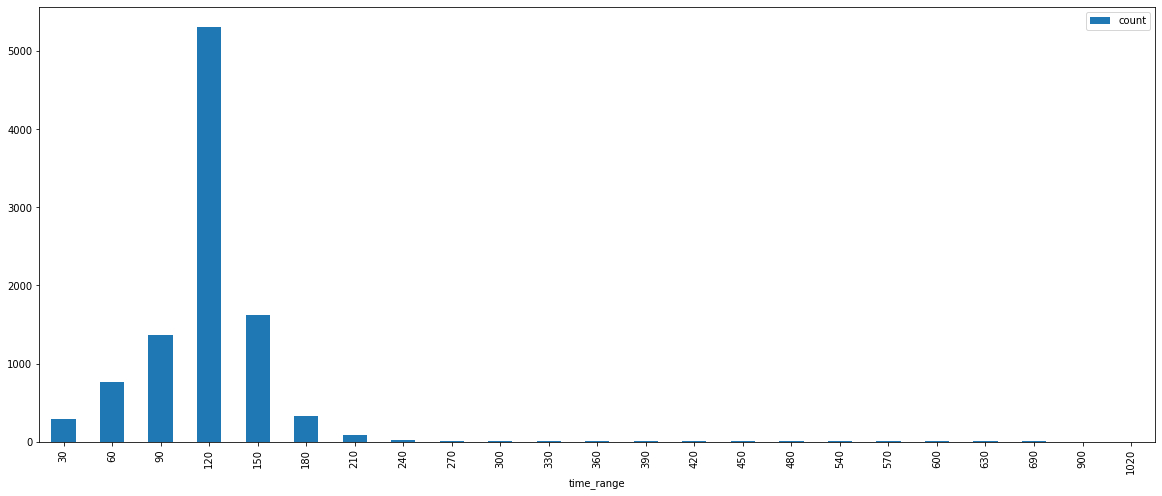

In [56]:
df_buckets.plot(x='time_range', y='count', kind='bar',xlim=(0,1100),figsize=(20,8))
